In [1]:
library(ggpubr)
library(dplyr)
library(tidyr)
library(repr)

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("freeze_thaw_data.csv")


# Reshape the data
df_long <- df %>%
  pivot_longer(cols = c("Fresh.unfixed", "Freeze.thaw", "Frozen.Fixed"),
               names_to = "Group",
               values_to = "Value") %>%
  drop_na(Value)  # Remove NAs


In [6]:
options(repr.plot.width = 7, repr.plot.height = 6)


df_filtered <- df_long %>%
  filter(Value <= 200) %>%
  mutate(Group = recode(Group,
                        "Fresh.unfixed" = "Snap Frozen",
                        "Freeze.thaw" = "Frozen Thaw",
                        "Frozen.Fixed" = "Fixed Frozen"))

# Define the comparisons with new group names
my_comparisons <- list(c("Snap Frozen", "Frozen Thaw"),
                       c("Frozen Thaw", "Fixed Frozen"),
                       c("Snap Frozen", "Fixed Frozen"))

# Custom colors (optional, adjust as needed)
custom_colors <- c("#00AFBB", "#E7B800", "#FC4E07")  # Example palette
pdf("artifact_effects.pdf", width = 7, height = 6)

# Generate the violin plot
ggviolin(df_filtered, x = "Group", y = "Value",
         add = "boxplot", fill = "Group", color = "black", palette = custom_colors,
         add.params = list(fill = "white", color = "black")) +  # Black outlines for boxplot

  # Add significance markers and tests
  stat_compare_means(comparisons = my_comparisons, label = "p.format", size = 5) +  # Pairwise significance levels with larger text size
  ylim(NA, max(df_filtered$Value) + 60) +  # Adjust y-axis limit to avoid cutoff
  theme(text = element_text(size = 18),  # Increase font size
        axis.text = element_text(size = 18),
        axis.title = element_text(size = 18)) + 
  ylab("Young Moduli (kPa)") + 
  xlab("Condition Group") +
  scale_fill_manual(values = custom_colors)
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 6 rows containing missing values (`geom_violin()`).”


png 
  2

In [7]:
pdf("artifact_effects.pdf", width = 7, height = 6)

# Generate the violin plot
ggviolin(df_filtered, x = "Group", y = "Value",
         add = "boxplot", fill = "Group", color = "black", palette = custom_colors,
         add.params = list(fill = "white", color = "black")) +  # Black outlines for boxplot

  # Add significance markers and tests
  stat_compare_means(comparisons = my_comparisons, label = "p.format", size = 5) +  # Pairwise significance levels with larger text size
  ylim(NA, max(df_filtered$Value) + 60) +  # Adjust y-axis limit to avoid cutoff
  theme(text = element_text(size = 18),  # Increase font size
        axis.text = element_text(size = 18),
        axis.title = element_text(size = 18)) + 
  ylab("Young Moduli (kPa)") + 
  xlab("Condition Group") +
  scale_fill_manual(values = custom_colors)
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 6 rows containing missing values (`geom_violin()`).”


png 
  2

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


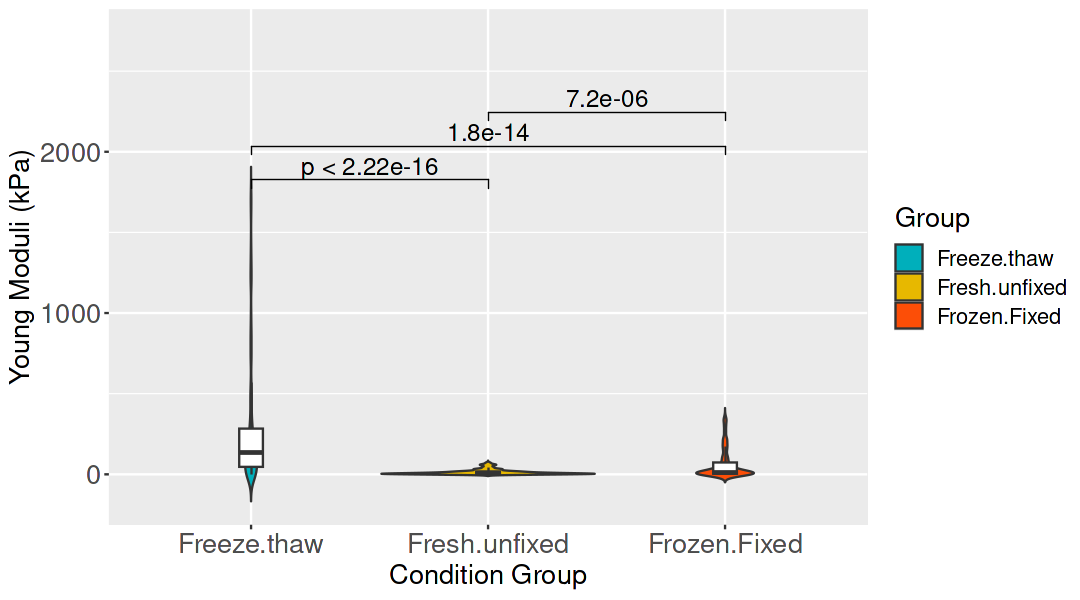

In [40]:
# Define the comparisons
my_comparisons <- list(c("Fresh.unfixed", "Freeze.thaw"),
                       c("Freeze.thaw", "Frozen.Fixed"),
                       c("Fresh.unfixed", "Frozen.Fixed"))

# Custom colors (optional, adjust as needed)
custom_colors <- c("#00AFBB", "#E7B800", "#FC4E07")  # Example palette

# Generate the violin plot
ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  
  # Violin plot
  geom_violin(trim = FALSE) +
  
  # Boxplot without outliers
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  
  # Add significance markers and tests
  stat_compare_means(comparisons = my_comparisons, label = "p.format", size = 5) +
  
  # Log transformation of y-axis
  scale_y_log10() +
  
  # Adjust y-axis limits to avoid cutoff
  ylim(NA, max(df_long$Value) + 1000) +
  
  # Customizing the theme and axis labels
  theme(text = element_text(size = 16),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 16)) +
  ylab("Young Moduli (kPa)") +
  xlab("Condition Group") +
  
  # Custom color palette
  scale_fill_manual(values = custom_colors)


Warning message:
“Removed 9 rows containing missing values (`geom_signif()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_signif()`).”


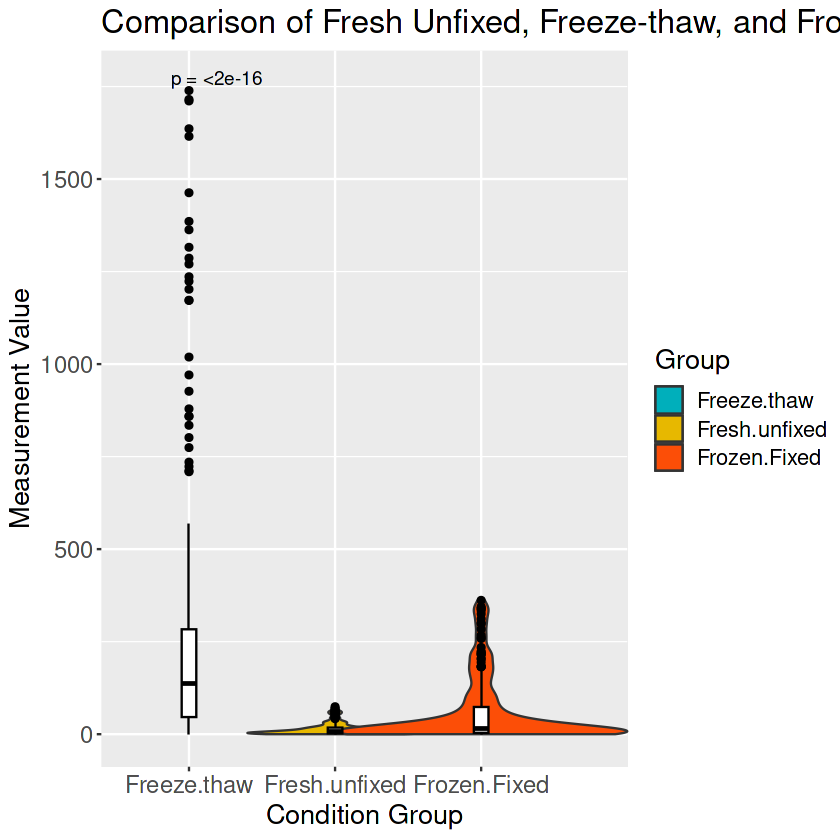

In [17]:
ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  # Manually adjust the widths of the violins
  geom_violin(data = df_long %>% filter(Group == "Fresh.unfixed"), width = 1.2) +
  geom_violin(data = df_long %>% filter(Group == "Freeze_thaw"), width = 1.8) +  # Larger violin for second group
  geom_violin(data = df_long %>% filter(Group == "Frozen.Fixed"), width = 2.0) + # Larger violin for third group
  geom_boxplot(width = 0.1, fill = "white", color = "black", outlier.size = 1.5) +  # Boxplot inside violin

  # Add significance markers and tests
  stat_compare_means(comparisons = my_comparisons, label = "p.signif") +  # Pairwise significance levels
  stat_compare_means(method = "kruskal.test", label = "p", label.x = 1, label.y = max(df_long$Value) + 15) + 
  ylim(NA, max(df_long$Value) + 20) +  # Adjust y-axis limit to avoid cutoff
  theme(text = element_text(size = 16),  # Increase font size
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 16)) + 
  ylab("Measurement Value") + 
  xlab("Condition Group") +
  ggtitle("Comparison of Fresh Unfixed, Freeze-thaw, and Frozen-fixed Samples") + 
  scale_fill_manual(values = custom_colors) +  # Custom colors
  geom_signif(comparisons = my_comparisons, 
              map_signif_level = TRUE, 
              step_increase = 0.1, 
              tip_length = 0.02)  # Add significance bars with p-values
